In [48]:
import pandas as pd
import numpy as np

In [49]:
df=pd.read_csv("/content/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [50]:
columns_to_remove = ['loan_id']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)


In [51]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [52]:
print("Dataset Shape:", df.shape)

Dataset Shape: (4269, 12)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [54]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [55]:
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [56]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [57]:
def uniquevals(col):
    print(f'Unique Values in {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(df[col].value_counts())}')

for col in df.columns:
    valuecounts(col)
    print("")

Valuecounts of  no_of_dependents is: 6

Valuecounts of  education is: 2

Valuecounts of  self_employed is: 2

Valuecounts of  income_annum is: 98

Valuecounts of  loan_amount is: 378

Valuecounts of  loan_term is: 10

Valuecounts of  cibil_score is: 601

Valuecounts of  loan_status is: 2

Valuecounts of Movable_assets is: 484

Valuecounts of Immovable_assets is: 406



In [58]:
catagorical_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

print(catagorical_data)
print(numerical_data)

Index([' education', ' self_employed', ' loan_status'], dtype='object')
Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', 'Movable_assets', 'Immovable_assets'],
      dtype='object')


In [59]:
df.isna().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
loan_status,0
Movable_assets,0
Immovable_assets,0


In [60]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_assets     4269 non-null   int64 
 9   Immovable_assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


In [62]:
import matplotlib.pyplot as plt

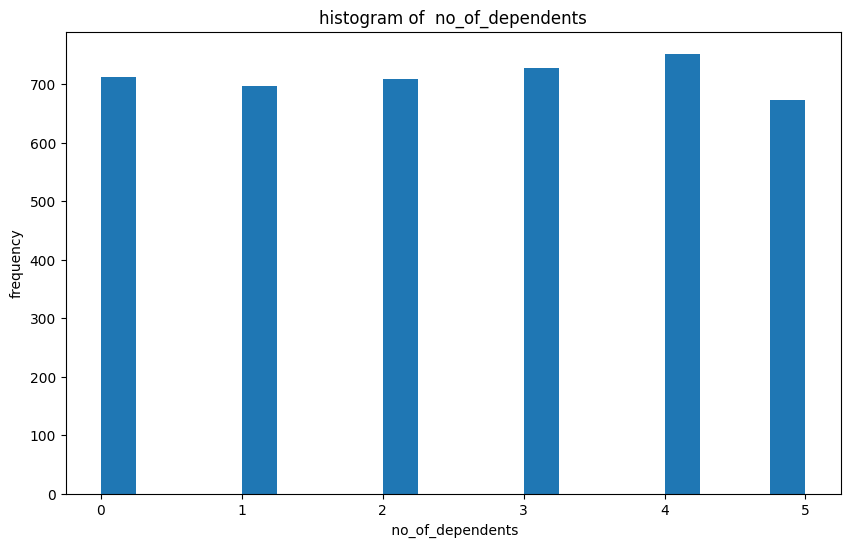

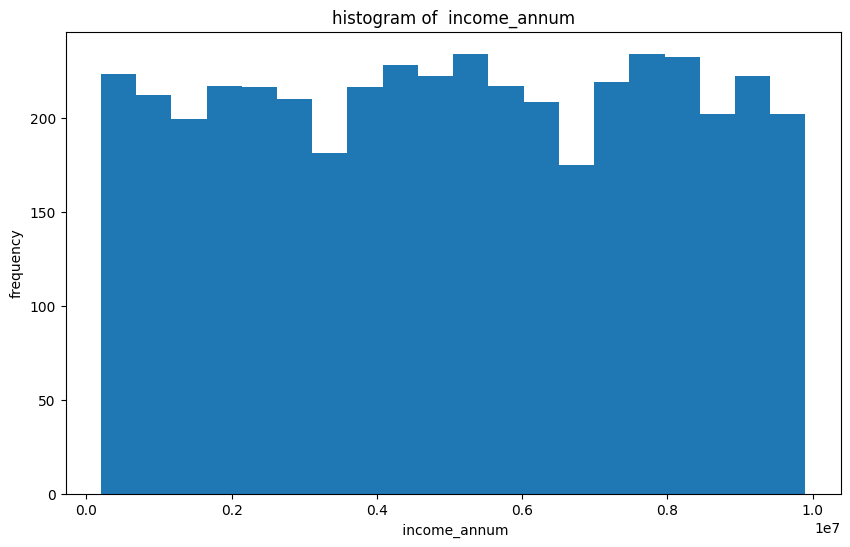

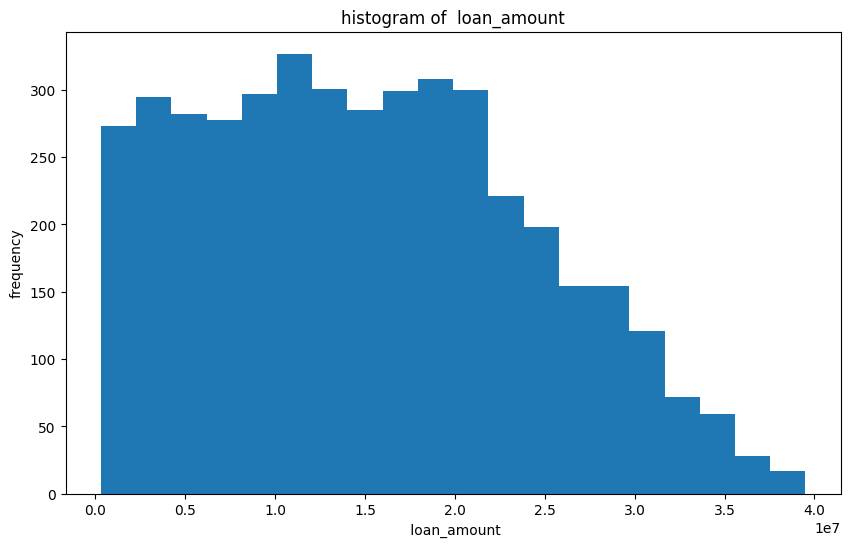

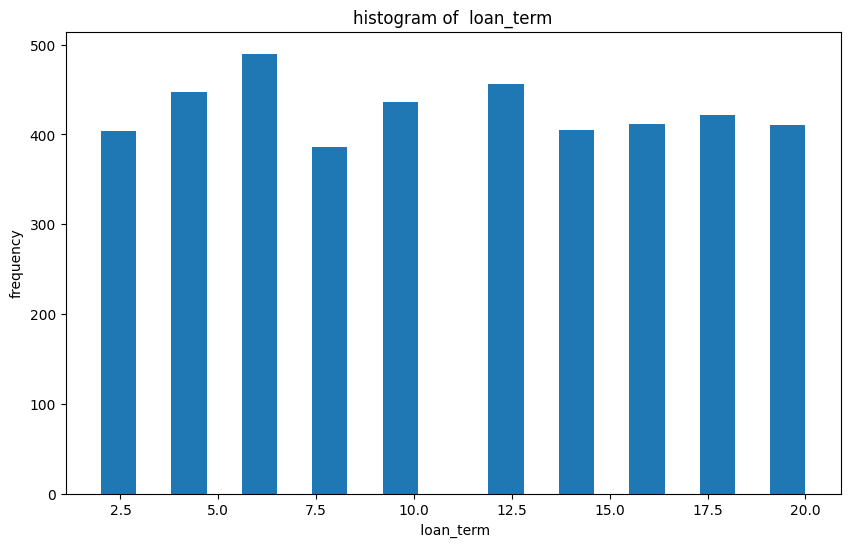

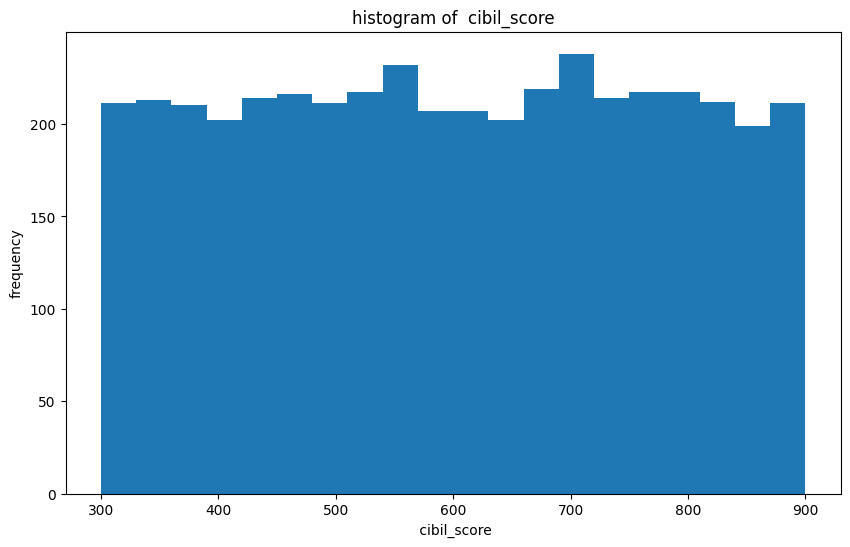

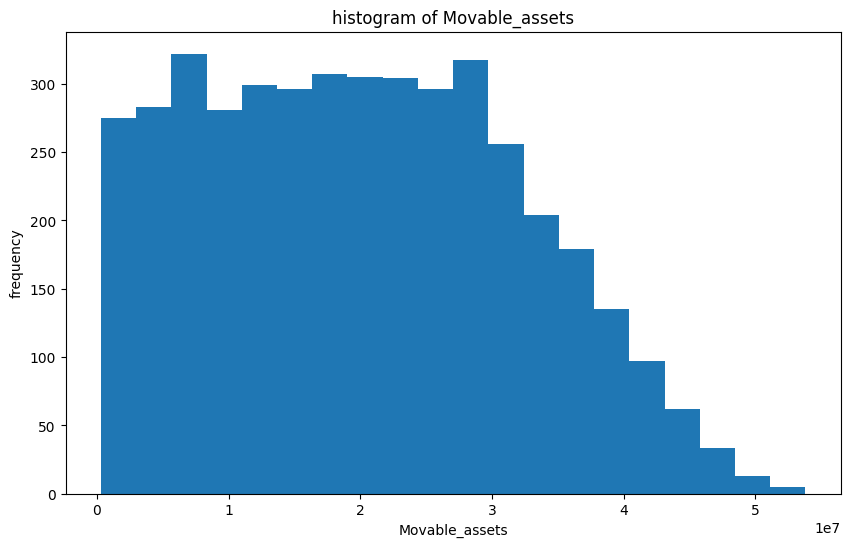

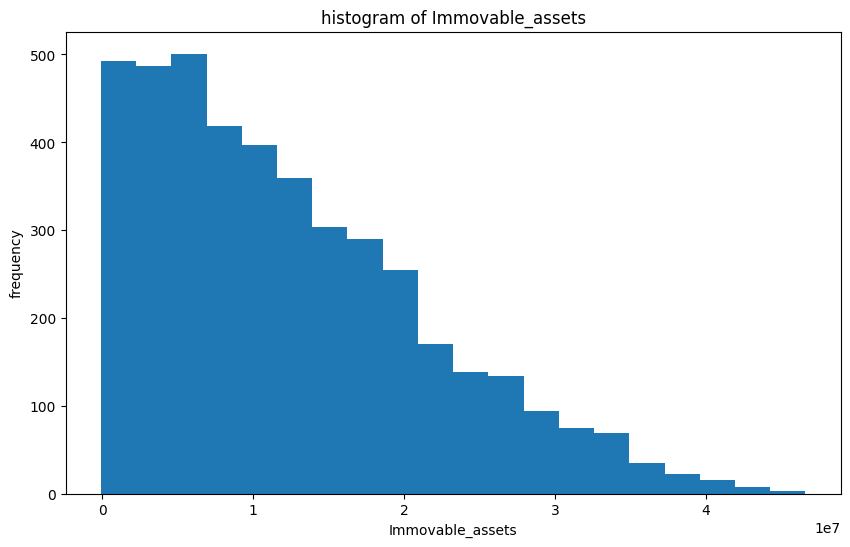

In [63]:
numerical_features=df.select_dtypes(include=['int32','int64','float32','float64']).columns
numerical_features
for feature in numerical_features:
  plt.figure(figsize=(10,6))
  plt.hist(df[feature],bins=20)
  plt.title(f"histogram of {feature}")
  plt.xlabel(feature)
  plt.ylabel("frequency")
  plt.show()

In [64]:
import seaborn as sns

Text(0.5, 1.0, 'Number of Dependents')

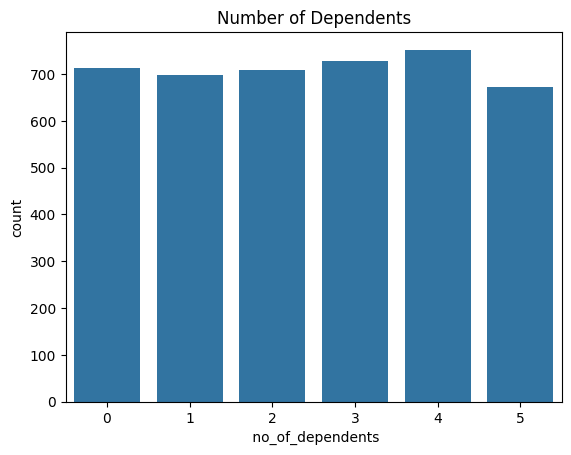

In [65]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

<Axes: xlabel=' no_of_dependents', ylabel='count'>

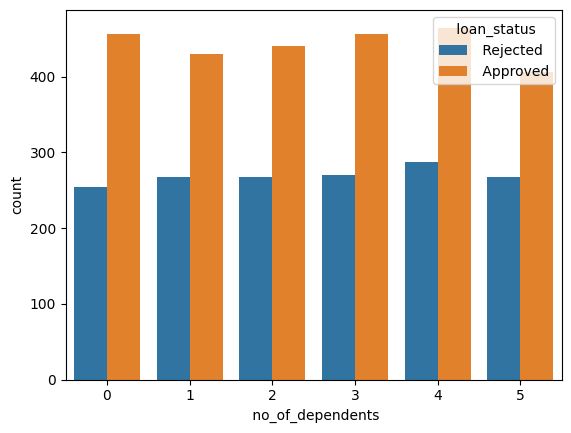

In [66]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

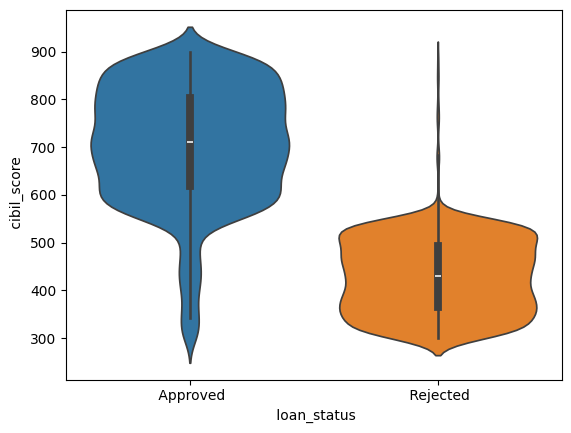

In [67]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df,hue=" loan_status")

In [68]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [71]:
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [72]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

In [76]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
1675,5,0,0,7900000,29900000,6,568,24600000,19700000
1164,0,0,1,9600000,34000000,12,710,45900000,34100000
192,1,1,0,800000,2900000,8,682,3600000,3300000
910,2,1,1,4900000,13100000,18,754,23700000,11500000
567,5,1,1,3000000,11100000,12,441,9300000,11000000
...,...,...,...,...,...,...,...,...,...
3444,0,1,1,1300000,4700000,16,530,4600000,4200000
466,5,0,1,500000,1800000,18,411,1500000,1500000
3092,4,0,1,8600000,20600000,16,449,34100000,21400000
3772,2,0,1,7000000,21400000,12,541,29400000,5000000


In [77]:
X_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
1703,5,1,0,5400000,19700000,20,423,23000000,16500000
1173,2,1,0,5900000,14000000,8,599,24500000,14200000
308,3,1,0,9600000,19900000,14,452,35100000,20400000
1322,2,1,0,6200000,23400000,8,605,31000000,20800000
3271,3,0,1,5800000,14100000,12,738,23800000,16100000
...,...,...,...,...,...,...,...,...,...
912,4,1,0,2500000,5400000,10,592,12800000,4900000
443,2,1,0,7700000,16700000,6,555,26600000,15800000
1483,5,0,1,5600000,11500000,4,695,19500000,16600000
668,4,0,0,2200000,8600000,20,373,7300000,5400000


In [78]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [80]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
dtree_pred = dtree.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, dtree_pred)
training_accuracy = dtree.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9836065573770492
